# NetworkX - Recipes

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.karate_club_graph()

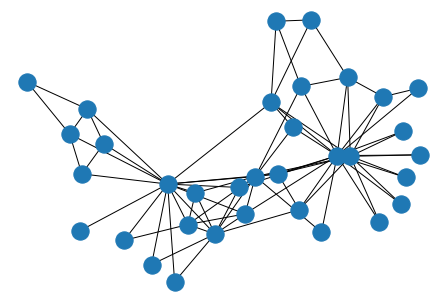

In [3]:
nx.draw_spring(G)

In [4]:
nx.write_gexf(G=G,path="karate.gexf")

# Adding attributes / labels

! pip install names

In [5]:
import names
names.get_full_name()

'Timothy Martone'

In [6]:
random_names = { i:names.get_full_name() for i in range(G.order()) }

In [7]:
len(random_names), len(set(random_names))

(34, 34)

In [8]:
random_names[0]

'William Lewis'

In [9]:
nx.set_node_attributes(G, random_names, "name")

In [10]:
nx.write_gexf(G=G,path="karate.gexf")

# Community

#### Using networkX

! pip install networkx

In [11]:
import networkx.algorithms.community as nx_comm

In [12]:
list_community_sets_greedy = list(nx_comm.greedy_modularity_communities(G))
print(list_community_sets_greedy)

[frozenset({32, 33, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}), frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}), frozenset({0, 4, 5, 6, 10, 11, 16, 19})]


In [13]:
partition_greedy = {}
for i, comm in enumerate(list_community_sets_greedy):
    print("Community:", i)
    print(i,comm)
    for n in comm:
        partition_greedy[n]=i


Community: 0
0 frozenset({32, 33, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31})
Community: 1
1 frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21})
Community: 2
2 frozenset({0, 4, 5, 6, 10, 11, 16, 19})


In [14]:
print(partition_greedy)

{32: 0, 33: 0, 8: 0, 14: 0, 15: 0, 18: 0, 20: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 1: 1, 2: 1, 3: 1, 7: 1, 9: 1, 12: 1, 13: 1, 17: 1, 21: 1, 0: 2, 4: 2, 5: 2, 6: 2, 10: 2, 11: 2, 16: 2, 19: 2}


In [15]:
nx.set_node_attributes(G, partition_greedy, "community_nx_greedy")

In [16]:
nx.write_gexf(G=G,path="karate.gexf")

#### Installing a library

https://github.com/taynaud/python-louvain
https://python-louvain.readthedocs.io/en/latest/api.html

! pip install python-louvain

In [17]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

In [18]:
partition_library = community_louvain.best_partition(G)

In [19]:
print(partition_library)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 0, 8: 2, 9: 0, 10: 1, 11: 0, 12: 0, 13: 0, 14: 2, 15: 2, 16: 1, 17: 0, 18: 2, 19: 0, 20: 2, 21: 0, 22: 2, 23: 3, 24: 3, 25: 3, 26: 2, 27: 3, 28: 3, 29: 2, 30: 2, 31: 3, 32: 2, 33: 2}


In [20]:
nx.set_node_attributes(G, partition_library, "community_library")

In [21]:
nx.write_gexf(G=G,path="karate.gexf")

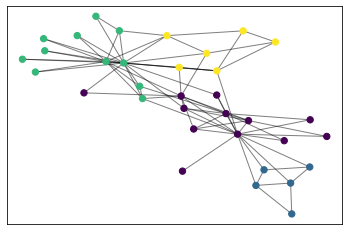

In [22]:
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition_library.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition_library.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition_library.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

# Evaluate communities

https://networkx.org/documentation/stable/reference/algorithms/community.html#module-networkx.algorithms.community.quality

Parameters

- G (NetworkX graph)

- partition (sequence) – Partition of the nodes of G, represented as a sequence of sets of nodes. Each block of the partition represents a community.

The coverage of a partition is the ratio of the number of intra-community edges to the total number of edges in the graph.

The performance of a partition is the ratio of the number of intra-community edges plus inter-community non-edges with the total number of potential edges.


In [23]:
comms = set(partition_library.values())
comms

{0, 1, 2, 3}

In [24]:
list_community_sets_library = [ set() for i in range(len(comms)) ]

In [25]:
for n, comm in partition_library.items():
    list_community_sets_library[comm].add(n)

list_community_sets_library

[{0, 1, 2, 3, 7, 9, 11, 12, 13, 17, 19, 21},
 {4, 5, 6, 10, 16},
 {8, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33},
 {23, 24, 25, 27, 28, 31}]

In [26]:
for my_list in [list_community_sets_greedy,  list_community_sets_library]:
    
    #print("Coverage")
    print("Coverage", nx_comm.coverage(G, my_list))
    #print("Modularity")
    print("Modularity", nx_comm.modularity(G, my_list, weight='weight'))
    #print("Performance")
    print("Performance", nx_comm.performance(G, my_list))
    
    print("---")

Coverage 0.7564102564102564
Modularity 0.3806706114398422
Performance 0.714795008912656
---
Coverage 0.7307692307692307
Modularity 0.41880341880341876
Performance 0.803921568627451
---


# k_clique_communities

In [27]:
#from networkx.algorithms.community import k_clique_communities
G_test = nx.complete_graph(5)
K5 = nx.convert_node_labels_to_integers(G_test, first_label=2)
G_test.add_edges_from(K5.edges())

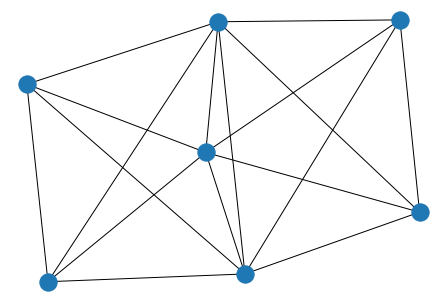

In [28]:
nx.draw(G_test)

In [29]:
print("min size: 4", list(nx_comm.k_clique_communities(G_test, 4)) ) # k (int) – Size of smallest clique)
print("min size: 6", list(nx_comm.k_clique_communities(G_test, 6)) ) # k (int) – Size of smallest clique)

min size: 4 [frozenset({0, 1, 2, 3, 4, 5, 6})]
min size: 6 []


In [30]:
print("min size: 6", list(nx_comm.k_clique_communities(G, 4)) ) # k (int) – Size of smallest clique)

min size: 6 [frozenset({0, 1, 2, 3, 7, 13}), frozenset({32, 33, 8, 30}), frozenset({32, 33, 29, 23})]


In [31]:
list_community_sets_kclique = nx_comm.k_clique_communities(G, 4)

In [32]:
map_kclique = {}

for i, kclique in enumerate(list_community_sets_kclique):
    print("Community:", i)
    print(i,kclique)
    for n in kclique:
        map_kclique[n]=i


Community: 0
0 frozenset({0, 1, 2, 3, 7, 13})
Community: 1
1 frozenset({32, 33, 8, 30})
Community: 2
2 frozenset({32, 33, 29, 23})


In [33]:
map_kclique

{0: 0, 1: 0, 2: 0, 3: 0, 7: 0, 13: 0, 32: 2, 33: 2, 8: 1, 30: 1, 29: 2, 23: 2}

In [34]:
nx.set_node_attributes(G, map_kclique, "k_clique_communities")

In [35]:
nx.write_gexf(G=G,path="karate.gexf")

# Size distribution of communities

In [36]:
list_community_sets_library

[{0, 1, 2, 3, 7, 9, 11, 12, 13, 17, 19, 21},
 {4, 5, 6, 10, 16},
 {8, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33},
 {23, 24, 25, 27, 28, 31}]

In [37]:
pairs = []
for i, nodes in enumerate(list_community_sets_library):
    print(i,len(nodes))
    comm_size = (i,len(nodes))
    pairs.append(comm_size)

0 12
1 5
2 11
3 6


In [38]:
pairs

[(0, 12), (1, 5), (2, 11), (3, 6)]

In [39]:
community_index = []
number_of_nodes = []

for comm, n_nodes in pairs:
    community_index.append(str(comm))
    number_of_nodes.append(n_nodes)    

Text(0, 0.5, 'Number of nodes')

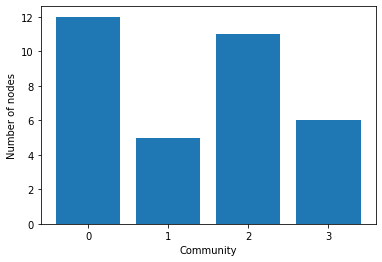

In [40]:
plt.bar(community_index,number_of_nodes)
plt.xlabel("Community")
plt.ylabel("Number of nodes")

# Centrality in communities

In [41]:
list_community_sets_library

[{0, 1, 2, 3, 7, 9, 11, 12, 13, 17, 19, 21},
 {4, 5, 6, 10, 16},
 {8, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33},
 {23, 24, 25, 27, 28, 31}]

In [42]:
for comm in list_community_sets_library:
    subgraph = G.subgraph(comm)
    print(subgraph.order())

12
5
11
6


In [43]:
centr_comm = {}
# node -> centrality in the community subgraph

In [44]:
for comm in list_community_sets_library:
    subgraph = G.subgraph(comm)
    print(subgraph.order())
    print(nx.degree_centrality(subgraph))
    print("---")

12
{0: 0.9090909090909092, 1: 0.7272727272727273, 2: 0.5454545454545454, 3: 0.5454545454545454, 7: 0.36363636363636365, 9: 0.09090909090909091, 11: 0.09090909090909091, 12: 0.18181818181818182, 13: 0.36363636363636365, 17: 0.18181818181818182, 19: 0.18181818181818182, 21: 0.18181818181818182}
---
5
{4: 0.5, 5: 0.75, 6: 0.75, 10: 0.5, 16: 0.5}
---
11
{32: 0.9, 33: 1.0, 8: 0.30000000000000004, 14: 0.2, 15: 0.2, 18: 0.2, 20: 0.2, 22: 0.2, 26: 0.2, 29: 0.30000000000000004, 30: 0.30000000000000004}
---
6
{23: 0.4, 24: 0.6000000000000001, 25: 0.6000000000000001, 27: 0.4, 28: 0.2, 31: 0.6000000000000001}
---


In [45]:
for comm in list_community_sets_library:
    subgraph = G.subgraph(comm)
    print(subgraph.order())
    print(nx.degree_centrality(subgraph))
    
    node_degrees  = nx.degree_centrality(subgraph)
    for n,d in node_degrees.items():
        centr_comm[n] = d

12
{0: 0.9090909090909092, 1: 0.7272727272727273, 2: 0.5454545454545454, 3: 0.5454545454545454, 7: 0.36363636363636365, 9: 0.09090909090909091, 11: 0.09090909090909091, 12: 0.18181818181818182, 13: 0.36363636363636365, 17: 0.18181818181818182, 19: 0.18181818181818182, 21: 0.18181818181818182}
5
{4: 0.5, 5: 0.75, 6: 0.75, 10: 0.5, 16: 0.5}
11
{32: 0.9, 33: 1.0, 8: 0.30000000000000004, 14: 0.2, 15: 0.2, 18: 0.2, 20: 0.2, 22: 0.2, 26: 0.2, 29: 0.30000000000000004, 30: 0.30000000000000004}
6
{23: 0.4, 24: 0.6000000000000001, 25: 0.6000000000000001, 27: 0.4, 28: 0.2, 31: 0.6000000000000001}


In [46]:
centr_comm

{0: 0.9090909090909092,
 1: 0.7272727272727273,
 2: 0.5454545454545454,
 3: 0.5454545454545454,
 7: 0.36363636363636365,
 9: 0.09090909090909091,
 11: 0.09090909090909091,
 12: 0.18181818181818182,
 13: 0.36363636363636365,
 17: 0.18181818181818182,
 19: 0.18181818181818182,
 21: 0.18181818181818182,
 4: 0.5,
 5: 0.75,
 6: 0.75,
 10: 0.5,
 16: 0.5,
 32: 0.9,
 33: 1.0,
 8: 0.30000000000000004,
 14: 0.2,
 15: 0.2,
 18: 0.2,
 20: 0.2,
 22: 0.2,
 26: 0.2,
 29: 0.30000000000000004,
 30: 0.30000000000000004,
 23: 0.4,
 24: 0.6000000000000001,
 25: 0.6000000000000001,
 27: 0.4,
 28: 0.2,
 31: 0.6000000000000001}

In [47]:
nx.set_node_attributes(G, centr_comm, "centr_comm")

In [48]:
nx.write_gexf(G=G,path="karate.gexf")

# POLITICAL BLOGS

https://sites.google.com/site/ucinetsoftware/datasets/polblogs

### FIX ERRORE:   
  
multigraph 1

In [49]:
G = nx.read_gml("polblogs.gml")

In [50]:
G.order(), G.size()

(1490, 19089)

In [51]:
G.is_multigraph()

True

In [52]:
G.is_directed()

True

In [53]:
G.remove_edges_from(nx.selfloop_edges(G))

In [54]:
G.order(), G.size()

(1490, 19086)

### Simplify: we ignore duplicate edges, making it just a DiGraph

In [55]:
G = nx.Graph(G)

In [56]:
G.is_multigraph()

False

In [57]:
G.is_directed()

False

In [58]:
G.order(), G.size()

(1490, 16715)

In [59]:
G.order(), G.size()

(1490, 16715)

In [60]:
G['100monkeystyping.com']

AtlasView({'rudepundit.blogspot.com': {}, 'townhall.com/clog': {}, 'tbogg.blogspot.com': {}, 'americablog.blogspot.com': {}, 'powerlineblog.com': {}, 'oliverwillis.com': {}, 'mydd.com': {}, 'talkleft.com': {}, 'lightupthedarkness.org': {}, 'blogforamerica.com': {}, 'dailykos.com': {}, 'juancole.com': {}, 'atrios.blogspot.com': {}, 'theleftcoaster.com': {}, 'talkingpointsmemo.com': {}, '12thharmonic.com/wordpress': {}, 'althippo.blogspot.com': {}, 'beastsbelly.blogspot.com': {}, 'burntorangereport.com': {}, 'dogfight04.typepad.com': {}, 'goose3five.blogspot.com': {}, 'hereswhatsleft.typepad.com': {}, 'hereswhatsleft.typepad.com/home': {}, 'peacegarden.blogspot.com': {}, 'robschumacher.blogspot.com': {}, 'markheimonen.blogspot.com': {}})

In [61]:
nx.write_gexf(G=G,path="blogs.gexf")

### Communities

In [62]:
import networkx.algorithms.community as nx_comm

In [63]:
list_community_sets_greedy = list(nx_comm.greedy_modularity_communities(G.to_undirected()))

In [64]:
partition_greedy = {}

for i, comm in enumerate(list_community_sets_greedy):

    for n in comm:
        partition_greedy[n]=i


In [65]:
nx.set_node_attributes(G, partition_greedy, "community_nx_greedy")

In [66]:
nx.write_gexf(G=G,path="blogs.gexf")

In [67]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

In [68]:
partition_library = community_louvain.best_partition(G.to_undirected())

In [69]:
nx.set_node_attributes(G, partition_library, "community_library")

In [70]:
nx.write_gexf(G=G,path="blogs.gexf")

In [71]:
comms = set(partition_library.values())

In [72]:
list_community_sets_library = [ set() for i in range(len(comms)) ]

In [73]:
for n, comm in partition_library.items():
    list_community_sets_library[comm].add(n)

#### Evaluate communities

In [74]:
for my_list in [list_community_sets_greedy,  list_community_sets_library]:
    
    #print("Coverage")
    print("Coverage", nx_comm.coverage(G, my_list))
    #print("Modularity")
    print("Modularity", nx_comm.modularity(G, my_list, weight='weight'))
    #print("Performance")
    print("Performance", nx_comm.performance(nx.Graph(G), my_list))
    
    print("---")

Coverage 0.9229434639545319
Modularity 0.4269285103710756
Performance 0.6984625508764497
---
Coverage 0.9203709243194735
Modularity 0.4270667287421071
Performance 0.7070814609147169
---


# Size distribution of communities

Text(0, 0.5, 'Number of nodes')

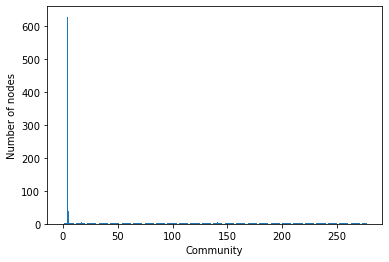

In [75]:
pairs = []
for i, nodes in enumerate(list_community_sets_library):
    #print(i,len(nodes))
    comm_size = (i,len(nodes))
    pairs.append(comm_size)
    
community_index = []
number_of_nodes = []

for comm, n_nodes in pairs:
    community_index.append(comm)
    number_of_nodes.append(n_nodes)   
    
plt.bar(community_index,number_of_nodes)
plt.xlabel("Community")
plt.ylabel("Number of nodes")


# Centrality in communities

In [76]:
for comm in list_community_sets_library:
    subgraph = G.subgraph(comm)
    
centr_comm = {} # node -> centrality in the community subgraph

for comm in list_community_sets_library:
    subgraph = G.subgraph(comm)
    
    
for comm in list_community_sets_library:
    subgraph = G.subgraph(comm)
    
    node_degrees  = nx.degree_centrality(subgraph)
    for n,d in node_degrees.items():
        centr_comm[n] = d

In [77]:
nx.set_node_attributes(G, centr_comm, "centr_comm")

In [78]:
nx.write_gexf(G=G,path="blogs.gexf")

# Bridges
https://networkx.org/documentation/stable/reference/algorithms/bridges.html

#### Bridges

In [79]:
G_test1 = nx.barbell_graph(10, 0)
nx.has_bridges(G_test1)

True

In [80]:
G_test2 = nx.cycle_graph(5)
nx.has_bridges(G_test2)


False

In [81]:
nx.has_bridges(G.to_undirected())

True

Yields e (edge) – An edge in the graph whose removal disconnects the graph (or causes the number of connected components to increase).

In [82]:
nx.set_edge_attributes(G, 0, name="is_bridge")

In [83]:
for br in nx.bridges(G.to_undirected(), root=None):
    #print("edge (src,target):", br)
    src,target = br
    G[src][target]['is_bridge'] = 1 

#### Local bridges

A local bridge is an edge whose endpoints have no common neighbors. That is, the edge is not part of a triangle in the graph.

The span of a local bridge is the shortest path length between the endpoints if the local bridge is removed.

In [84]:
nx.set_edge_attributes(G, 0, name="is_local_bridge")

In [85]:
for br in nx.local_bridges(G, with_span=True, weight=None):
    #print("edge (src,target, span):", br)
    src, target, span = br
    G[src][target]['is_local_bridge'] = 1

In [86]:
nx.write_gexf(G=G,path="blogs.gexf")

# Assortativity

In [87]:
G = nx.read_gml("polblogs.gml")

In [88]:
G = nx.DiGraph(G)

#### Degree Assortativity

https://networkx.org/documentation/stable/reference/algorithms/assortativity.html#id1

Nota: 4 casi associati alla direzionalità dei link. In nx ho i parametri:

x (string (‘in’,’out’)) – The degree type for source node (directed graphs only).

y (string (‘in’,’out’)) – The degree type for target node (directed graphs only).

combinazioni =  [("out","out"), ("out","in"), ("in","out") , ("in","in") ]


In [89]:
from datetime import datetime

In [90]:
combinazioni =  [("out","out"), ("out","in"), ("in","out") , ("in","in") ]

for combo in combinazioni:
    
    print(combo[0],combo[1])
    print(datetime.now())
    r = nx.degree_assortativity_coefficient(G, x=combo[0], y=combo[1])
    print("%3.1f"%r)
    print(datetime.now())
    print()

out out
2020-11-28 16:39:28.476212
-0.1
2020-11-28 16:39:28.520508

out in
2020-11-28 16:39:28.520838
-0.2
2020-11-28 16:39:28.576494

in out
2020-11-28 16:39:28.576568
-0.0
2020-11-28 16:39:28.630615

in in
2020-11-28 16:39:28.630822
-0.1
2020-11-28 16:39:28.683436



#### Attribute assortativity

nx.attribute_assortativity_coefficient(G, attribute= "", nodes=None)

nx.numeric_assortativity_coefficient(G, attribute = "", nodes=None)

In [91]:
nx.attribute_assortativity_coefficient(G, attribute= "value", nodes=None)

0.8229242280560486

#### Mixing matrix

In [92]:
#matplotlib
import matplotlib.pyplot as plt; 
from matplotlib.dates import DateFormatter
from matplotlib.dates import DayLocator
plt.rcdefaults()
import numpy as np
import matplotlib.colors as mcolors
#import matplotlib.pyplot as plt

In [93]:
import itertools
def plot_matrix(cm, classes,
                          title='Matrix',
                          cmap=plt.cm.Blues,
                          figsize = (5,5), xlabel = ' Class', ylabel= 'Class' ):
    """
    This function prints and plots the confusion matrix.
    """
    if figsize:
        plt.figure(figsize=figsize)
    
    #m = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=12)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    #fmt='.0f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel(xlabel, fontsize=12)
    plt.xlabel(ylabel, fontsize=12)

In [94]:
MM_attribute = nx.attribute_mixing_matrix(G, attribute = "value", nodes=None, mapping=None, normalized=True)
MM_attribute.shape

(2, 2)

In [95]:
MM_attribute

array([[0.440841  , 0.04105125],
       [0.0474113 , 0.47069645]])

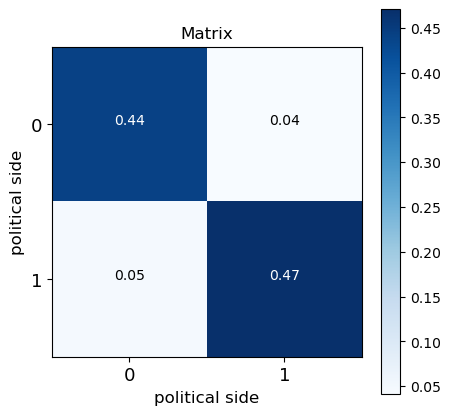

In [96]:
plot_matrix(MM_attribute,
                      classes = [ str(i) for i in range(MM_attribute.shape[0])], 
                      figsize=(5,5), 
                      xlabel="political side",
                      ylabel="political side")


In [97]:
MM_Degree = nx.degree_mixing_matrix(G, x='out', y='in', weight=None, nodes=None, normalized=True)
MM_Degree.shape

(338, 338)

#### On karate?

In [98]:
G = nx.karate_club_graph()

In [99]:
nx.attribute_assortativity_coefficient(G, attribute= "club", nodes=None)

0.717530864197531

In [100]:
MM_attribute = nx.attribute_mixing_matrix(G, attribute= "club", nodes=None, mapping=None, normalized=True)
MM_attribute.shape

(2, 2)

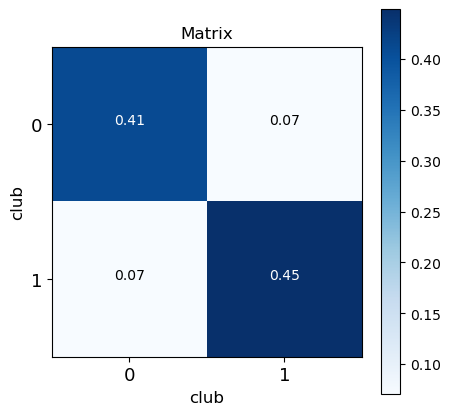

In [101]:
plot_matrix(MM_attribute,
                      classes = [ str(i) for i in range(MM_attribute.shape[0])], 
                      figsize=(5,5), 
                      xlabel="club",
                      ylabel="club")
